In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

odds_2017 = pd.read_csv('Final_Odds_2017-18.csv')
odds_2018 = pd.read_csv('Final_Odds_2018-19.csv')
odds_2019 = pd.read_csv('Final_Odds_2019-20.csv')
odds_2020 = pd.read_csv('Final_Odds_2020-21.csv')

In [16]:
odds_2020

,Date,Home Odds,Vis Odds,Home,Visitor,Home PTS,Vis PTS,Home Win
0,2021-03-27,1.47,2.77,Los Angeles Clippers,Philadelphia 76ers,122,112,True
1,2021-03-27,1.24,4.25,Sacramento Kings,Cleveland Cavaliers,100,98,True
2,2021-03-27,1.46,2.81,New Orleans Pelicans,Dallas Mavericks,112,103,True
3,2021-03-27,3.17,1.38,Oklahoma City Thunder,Boston Celtics,94,111,False
4,2021-03-27,1.24,4.32,Utah Jazz,Memphis Grizzlies,126,110,True
...,...,...,...,...,...,...,...,...
721,2020-12-11,1.46,2.74,Portland Trail Blazers,Sacramento Kings,127,102,True
722,2020-12-11,3.03,1.39,Los Angeles Lakers,Los Angeles Clippers,87,81,True
723,2020-12-11,1.58,2.41,Chicago Bulls,Houston Rockets,104,125,False
724,2020-12-11,1.36,3.16,Atlanta Hawks,Orlando Magic,112,116,False


In [25]:
dfs = [odds_2017,
        odds_2018,
        odds_2019,
        odds_2020,]

low_odds = 3
high_odds = 7

for df in dfs:
#     merged['Home Win'] = merged['Home PTS'] > merged['Vis PTS']
    home_ud = len(df[(df['Home Odds'] > low_odds) & (df['Home Win'] == True) & (df['Home Odds'] < high_odds)])
    all_home_ud = len(df[(df['Home Odds'] > low_odds) & (df['Home Odds'] < high_odds)])
    vis_ud = len(df[(df['Vis Odds'] > low_odds) & (df['Home Win'] == False) & (df['Vis Odds'] < high_odds)])
    all_vis_ud = len(df[(df['Vis Odds'] > low_odds) & (df['Vis Odds'] < high_odds)])
    print()
    print('Home UD: ',home_ud/all_home_ud)
    print('Vis UD: ',vis_ud/all_vis_ud)
    print()

    


Home UD:  0.2777777777777778
Vis UD:  0.24289405684754523


Home UD:  0.22857142857142856
Vis UD:  0.22666666666666666


Home UD:  0.2206896551724138
Vis UD:  0.2670807453416149


Home UD:  0.34375
Vis UD:  0.27485380116959063



In [13]:
#### Make this into a print for loop of above

home_ud = len(odds_2017[(odds_2017['Home Odds'] > odds_2017['Vis Odds']) & (odds_2017['Home Win'] == True)])
vis_ud = len(odds_2017[(odds_2017['Home Odds'] < odds_2017['Vis Odds']) & (odds_2017['Home Win'] == False)])
print()
print((home_ud + vis_ud) / len(odds_2017))
print()

0.31213872832369943

In [2]:
merged = pd.concat([odds_2017, odds_2018, odds_2019, odds_2020])
merged.sort_values(by='Date', inplace=True)

merged['Home Win'] = merged['Home PTS'] > merged['Vis PTS']

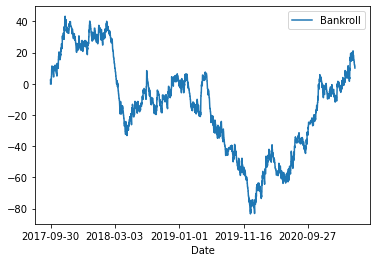

In [25]:
odds_low = 2.9
odds_high = 7

conditions = [
    ((merged['Vis Odds'] > odds_low) & (merged['Home Win'] == True) & (merged['Vis Odds'] < odds_high)),
    ((merged['Home Odds'] > odds_low) & (merged['Home Win'] == False) & (merged['Home Odds'] < odds_high)),
    ((merged['Vis Odds'] > odds_low) & (merged['Home Win'] == False) & (merged['Vis Odds'] < odds_high)),
    ((merged['Home Odds'] > odds_low) & (merged['Home Win'] == True) & (merged['Home Odds'] < odds_high)),
    (True)
]

values = [-1, -1, merged['Vis Odds'] - 1, merged['Home Odds'] - 1, 0]

merged['Outcome'] = np.select(conditions, values)

merged['Bankroll'] = merged['Outcome'].cumsum()
merged.plot(x="Date", y='Bankroll')
plt.show()